In [90]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
import bz2,pickle

In [12]:
# Load the Excel file
df = pd.read_excel('Folds5x2_pp.xlsx')

# Display the data
print(df.head())


      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [14]:
# Columns which has null values
df[df.isnull().any(axis=1)]

Empty DataFrame
Columns: [AT, V, AP, RH, PE]
Index: []

In [16]:
df.describe()

AT            V           AP           RH           PE
count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean     19.651231    54.305804  1013.259078    73.308978   454.365009
std       7.452473    12.707893     5.938784    14.600269    17.066995
min       1.810000    25.360000   992.890000    25.560000   420.260000
25%      13.510000    41.740000  1009.100000    63.327500   439.750000
50%      20.345000    52.080000  1012.940000    74.975000   451.550000
75%      25.720000    66.540000  1017.260000    84.830000   468.430000
max      37.110000    81.560000  1033.300000   100.160000   495.760000

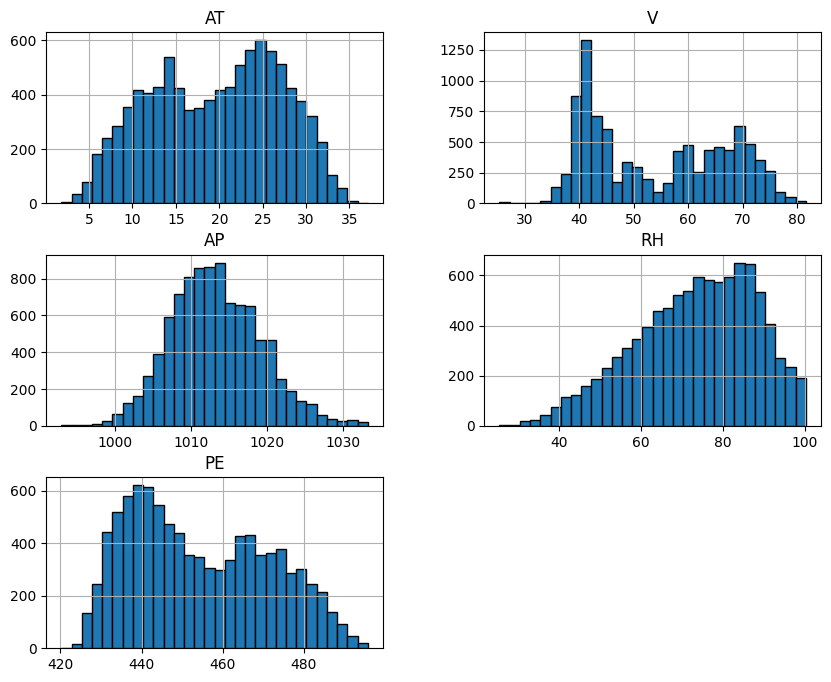

In [17]:
df.hist(bins=30, figsize=(10, 8), ec='black')
plt.show()

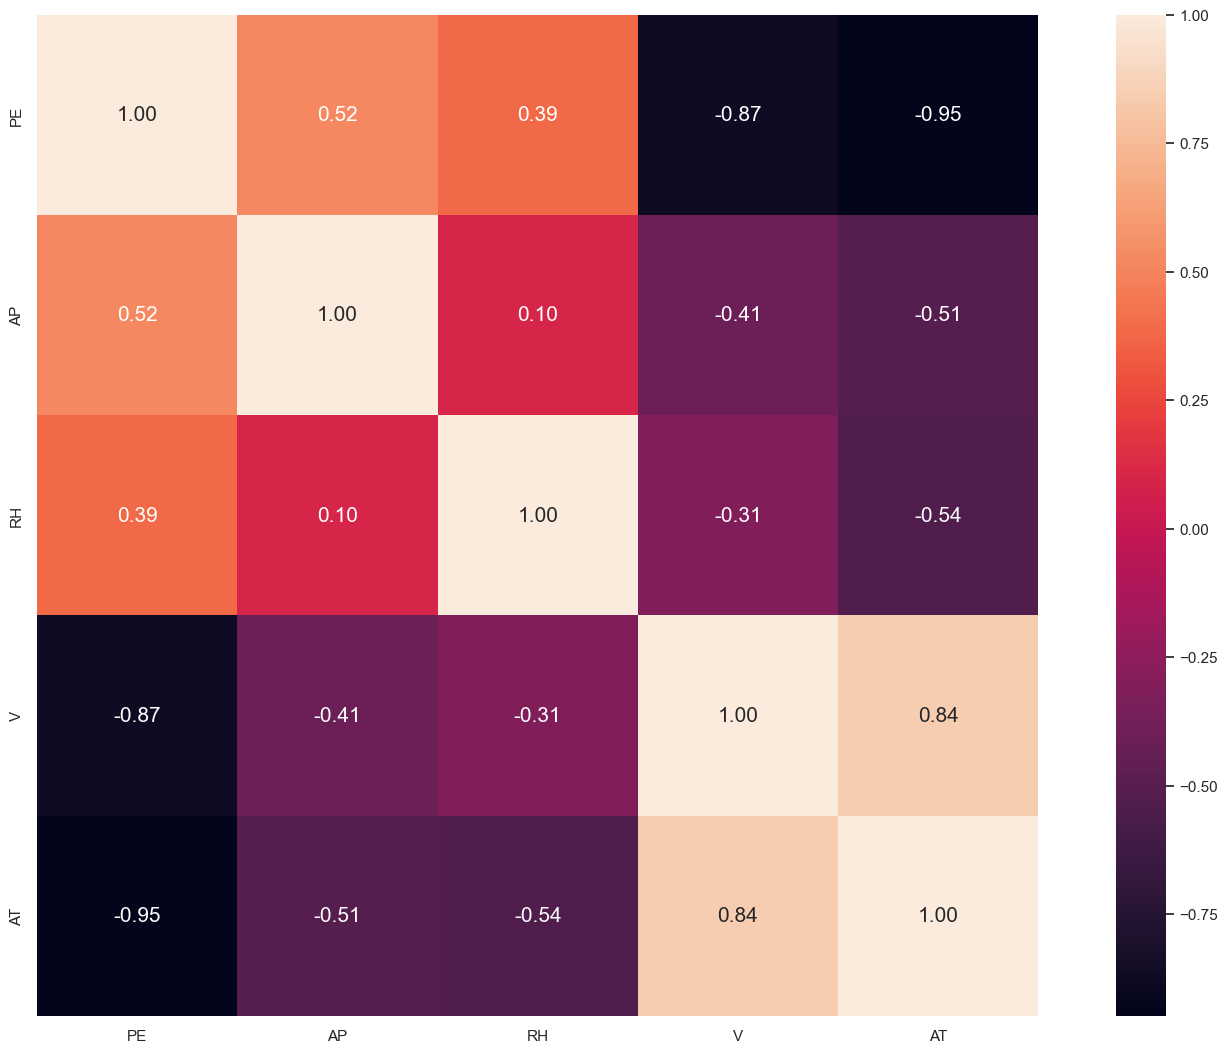

In [21]:
# Correlation chart
k = len(df.columns)
cols = df.corr()['PE'].nlargest(k).index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1)
f, ax = plt.subplots(figsize=(20, 13))
hm = sns.heatmap(cm, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

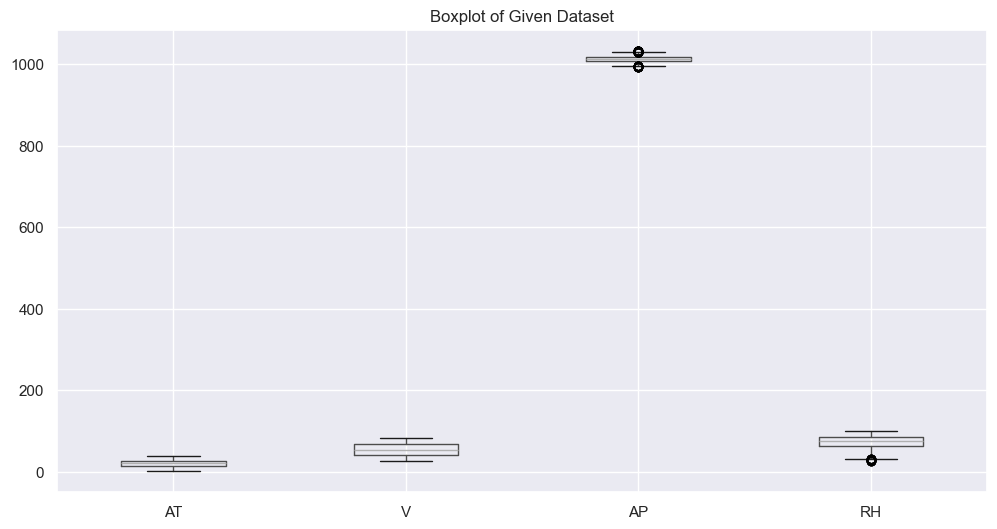

In [50]:
dftemp = df.drop(['PE'], axis=1)
fig = plt.figure(figsize =(12, 6))
ax = dftemp.boxplot()
ax.set_title("Boxplot of Given Dataset")
plt.show()

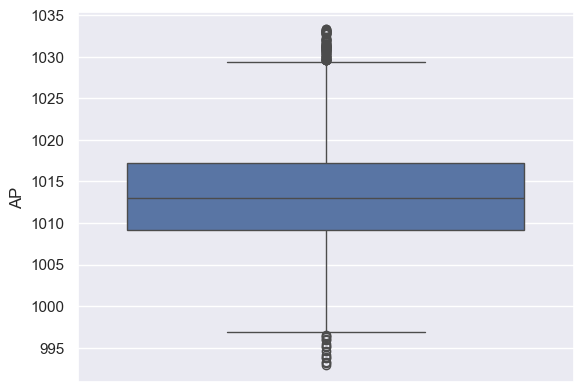

In [49]:
#Boxplot
ap_bp = sns.boxplot(df['AP'])

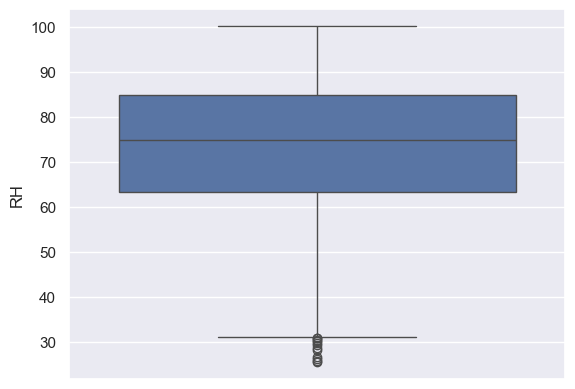

In [25]:
rh_bp = sns.boxplot(df['RH'])

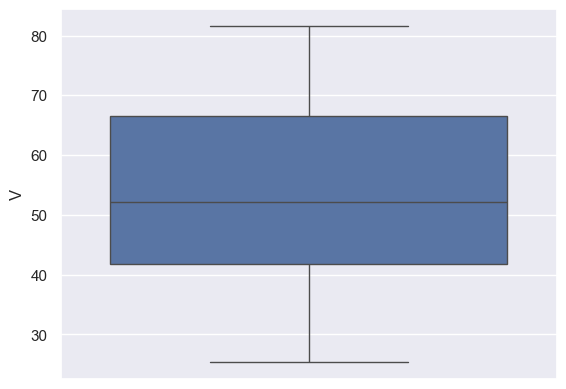

In [26]:
v_bp = sns.boxplot(df['V'])

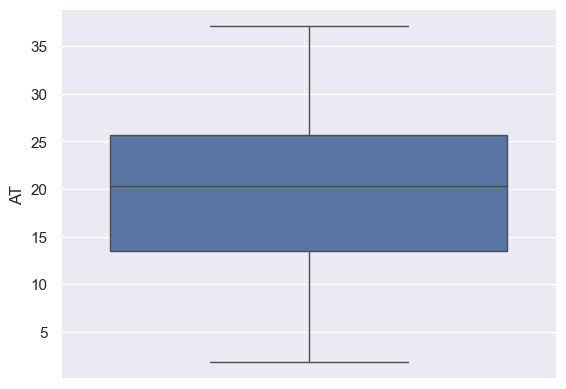

In [27]:
at_bp = sns.boxplot(df['AT'])

In [32]:
def scatter_plot(feature, xlabel, ylabel):
    plt.figure(figsize=[14, 8])
    sns.scatterplot(x=df[feature], y=df['PE'], alpha=0.7)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"Scatter Plot of {xlabel} vs {ylabel}")
    plt.show()


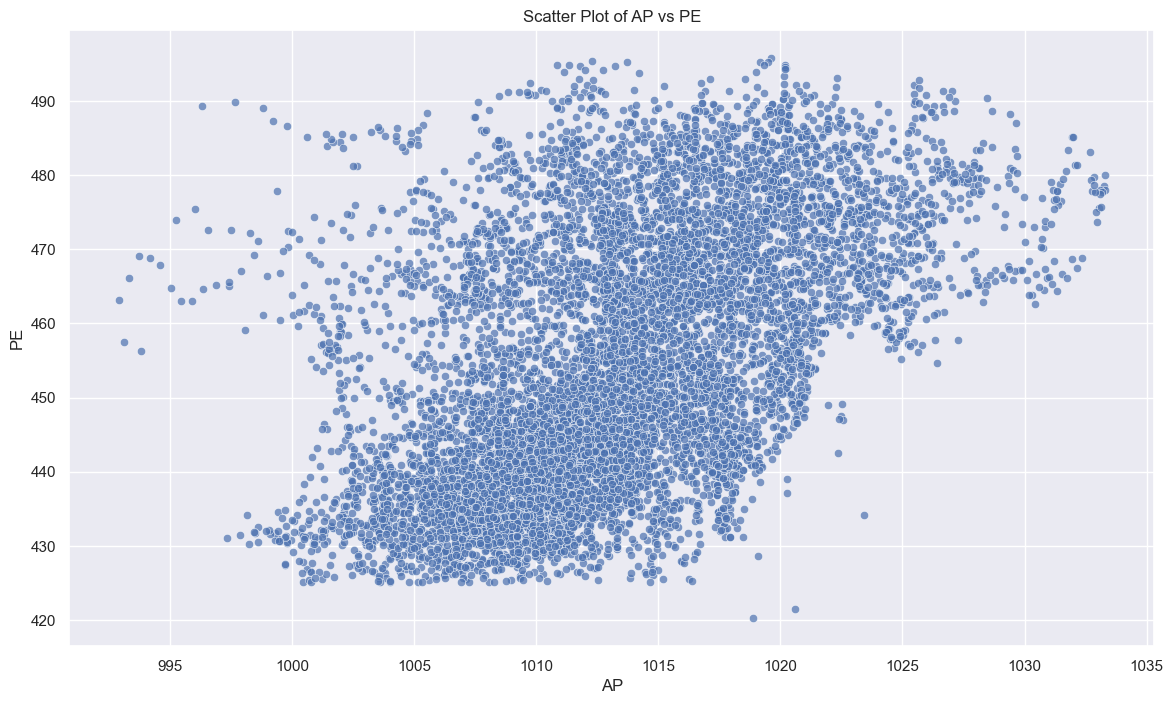

In [34]:
scatter_plot('AP', 'AP', 'PE')

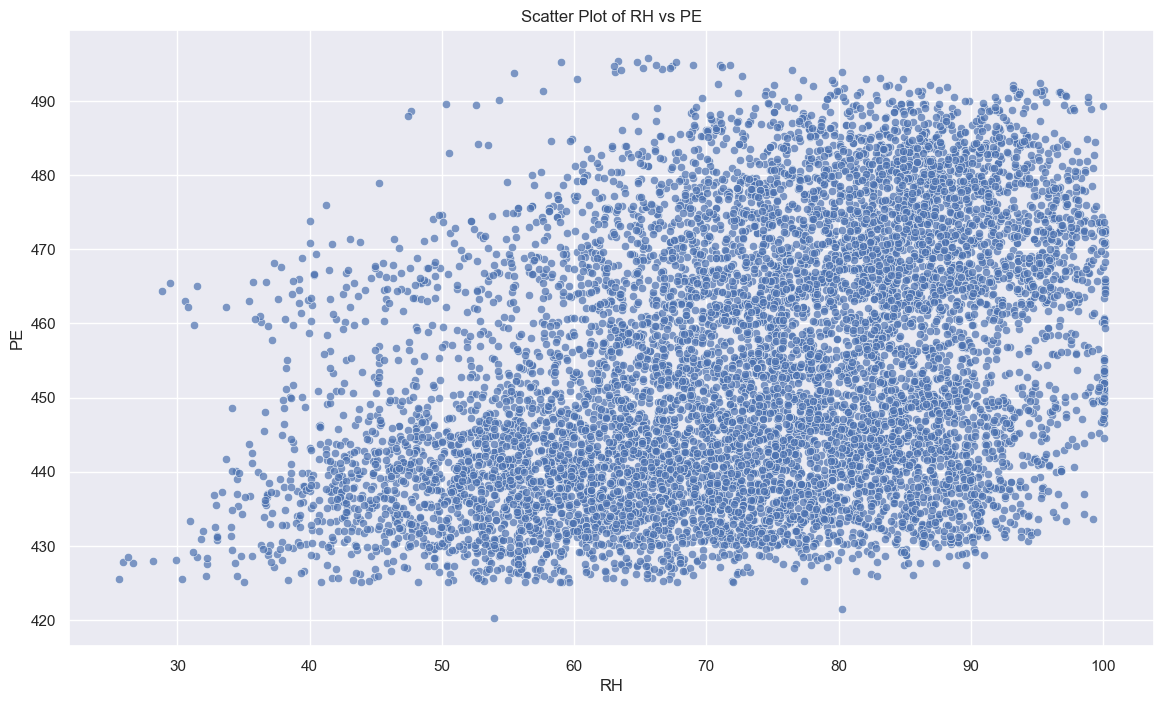

In [35]:
scatter_plot('RH', 'RH', 'PE')

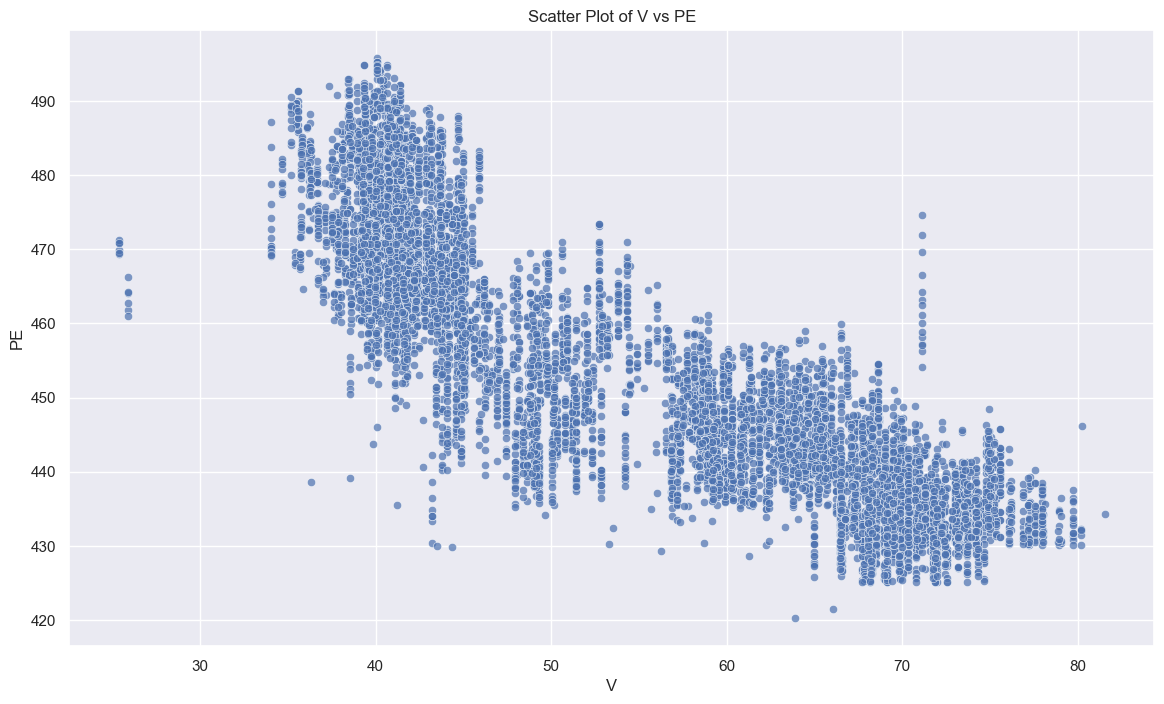

In [36]:
scatter_plot('V', 'V', 'PE')

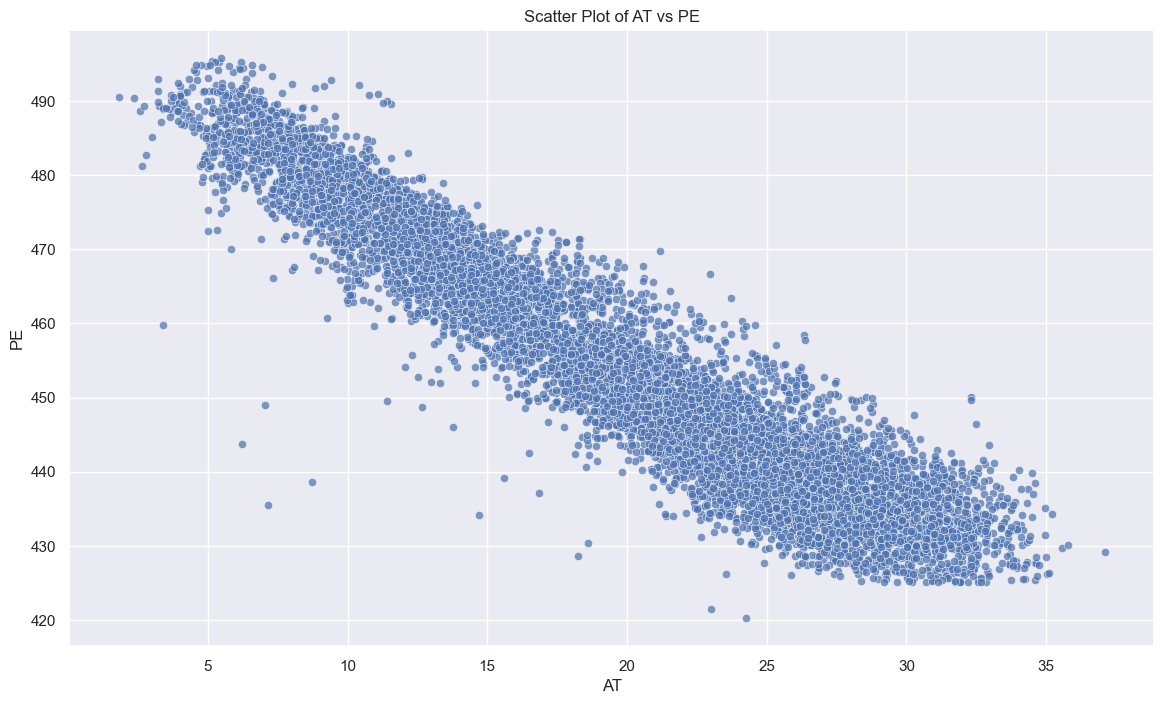

In [37]:
scatter_plot('AT', 'AT', 'PE')

In [38]:
def hexbin_plot(feature, xlabel, ylabel):
    plt.figure(figsize=[14, 8])
    plt.hexbin(df[feature], df['PE'], gridsize=50, cmap='coolwarm', mincnt=1)
    plt.colorbar(label='Counts')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"Hexbin Plot of {xlabel} vs {ylabel}")
    plt.show()

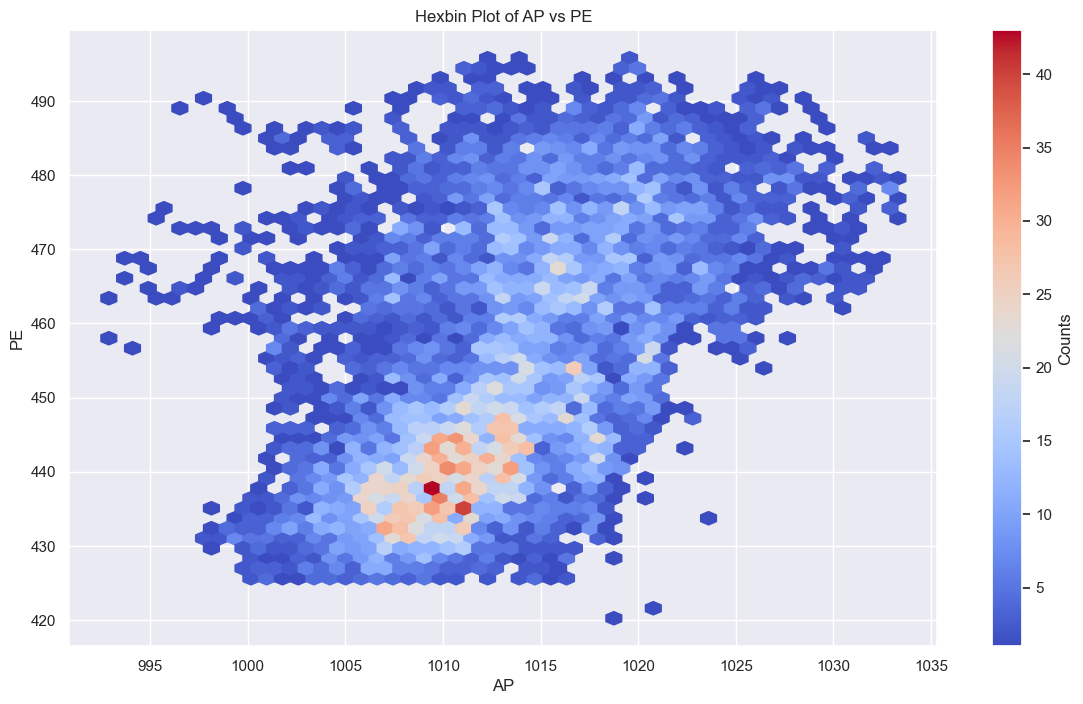

In [40]:
hexbin_plot('AP', 'AP', 'PE')

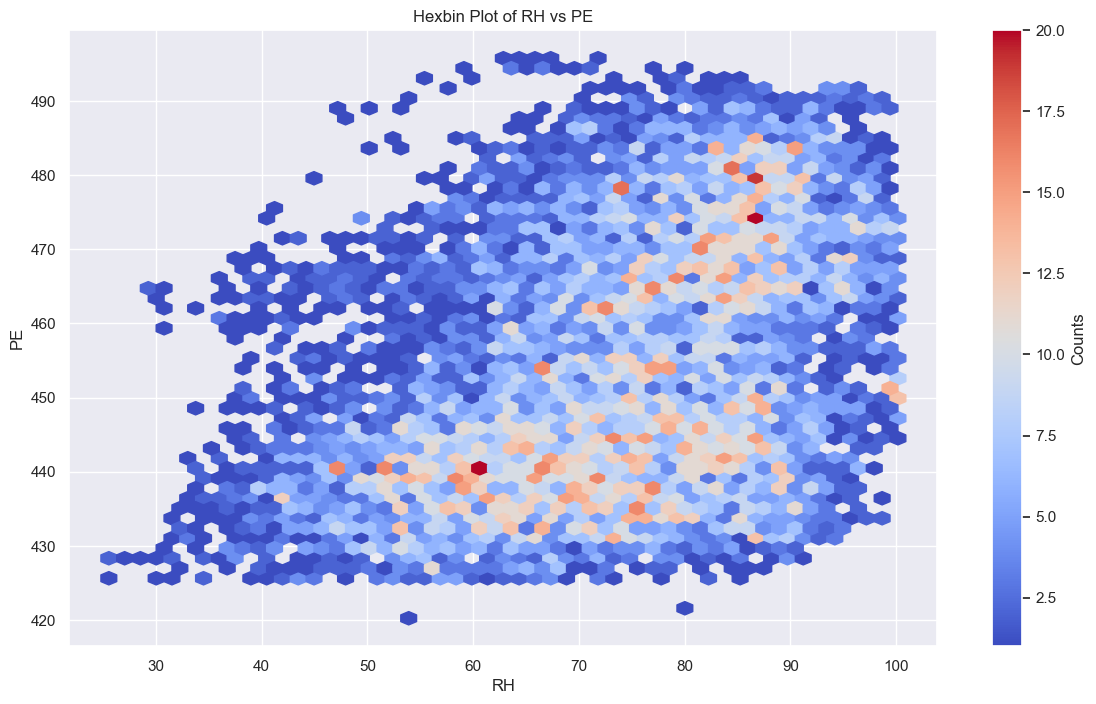

In [39]:
hexbin_plot('RH', 'RH', 'PE')

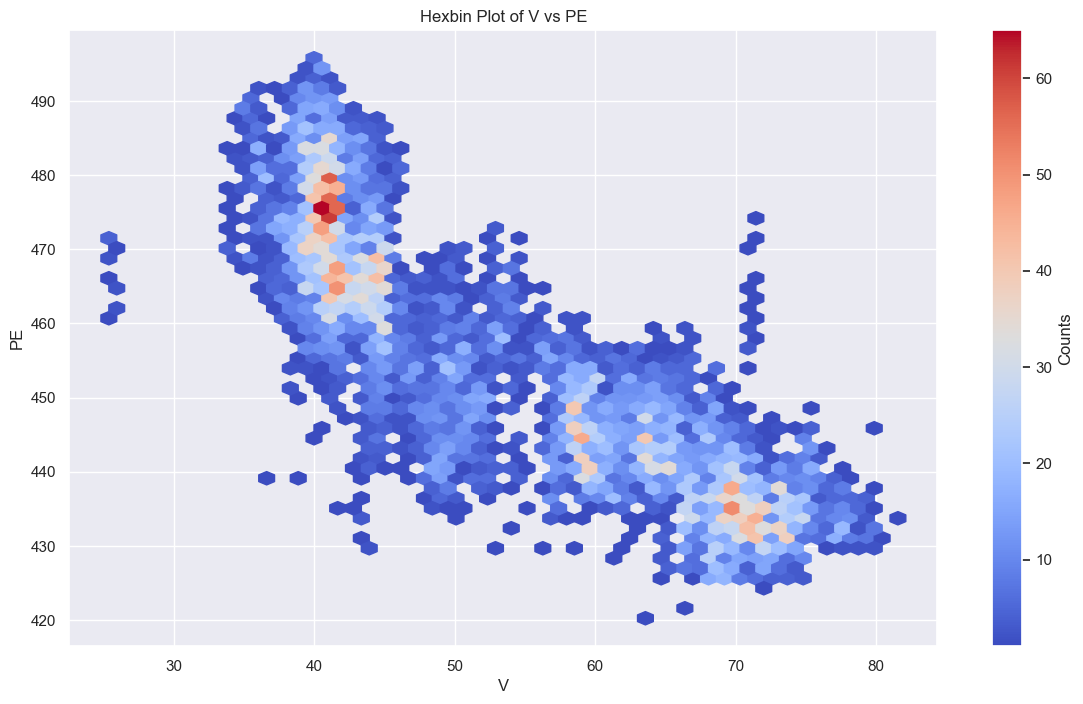

In [41]:
hexbin_plot('V', 'V', 'PE')

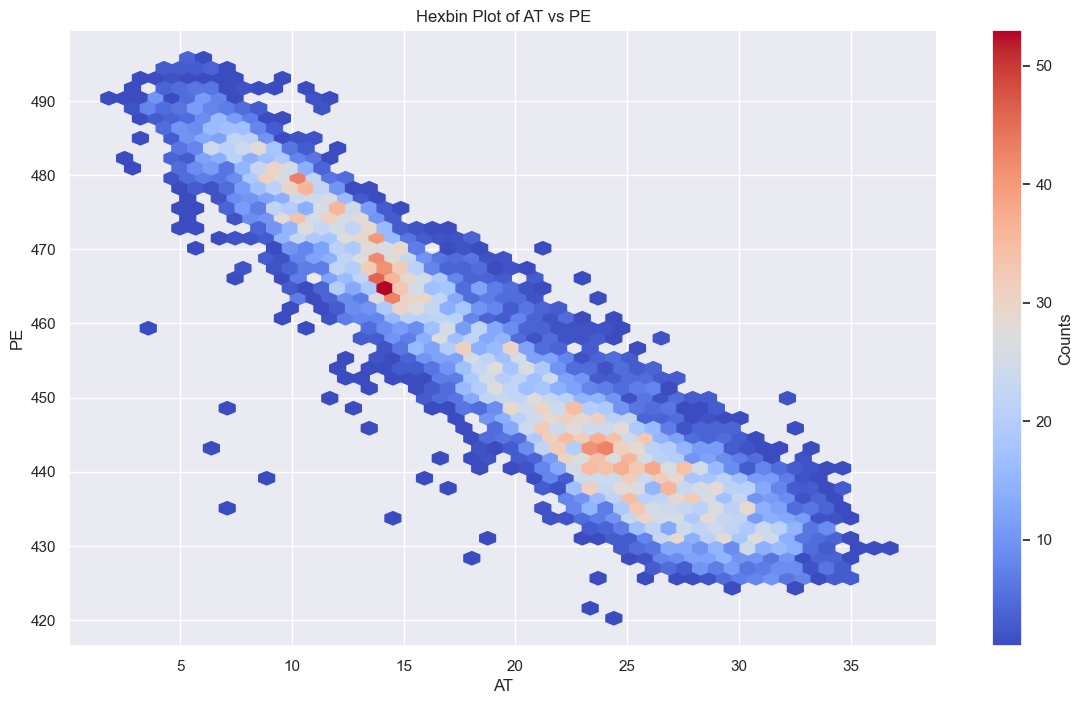

In [42]:
hexbin_plot('AT', 'AT', 'PE')

In [43]:
def regression_plot(feature, xlabel, ylabel):
    plt.figure(figsize=[14, 8])
    sns.regplot(x=df[feature], y=df['PE'], scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"Regression Plot of {xlabel} vs {ylabel}")
    plt.show()

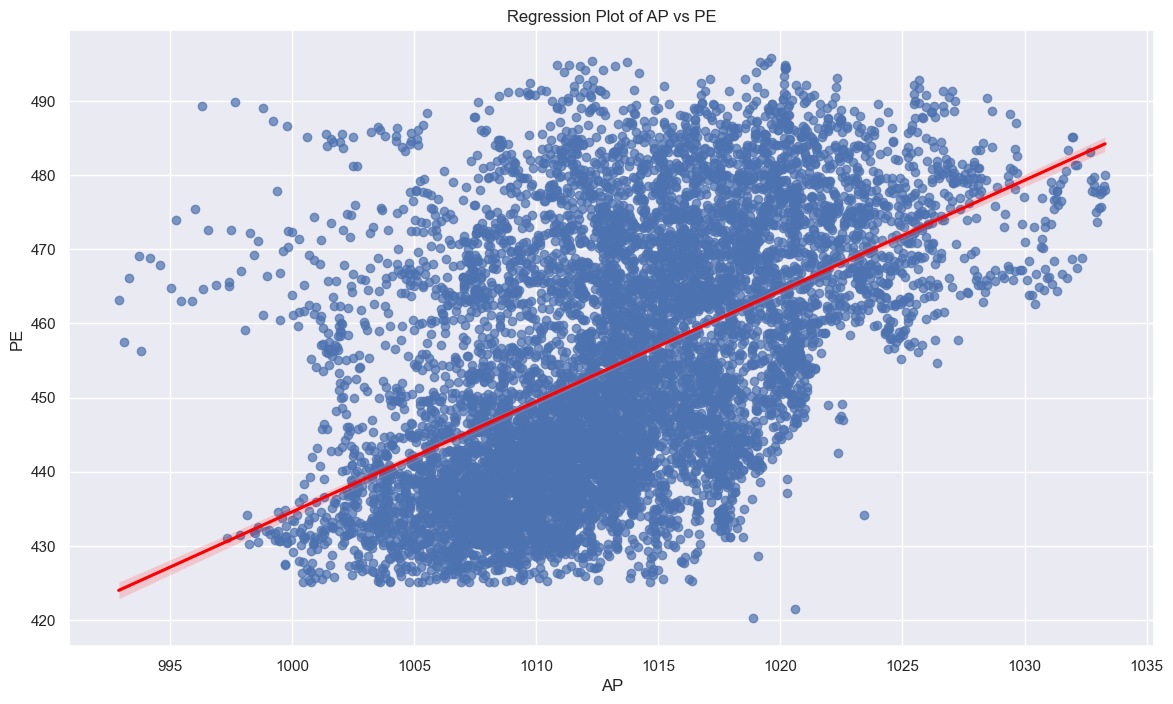

In [44]:
regression_plot('AP', 'AP', 'PE')

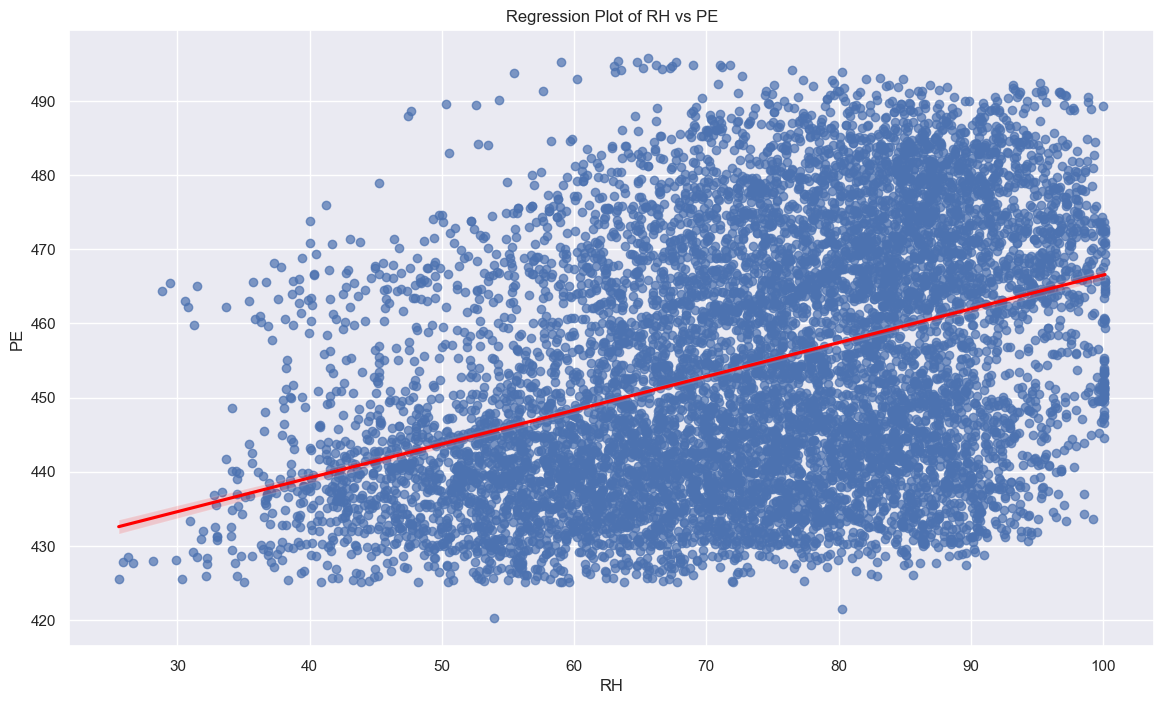

In [45]:
regression_plot('RH', 'RH', 'PE')

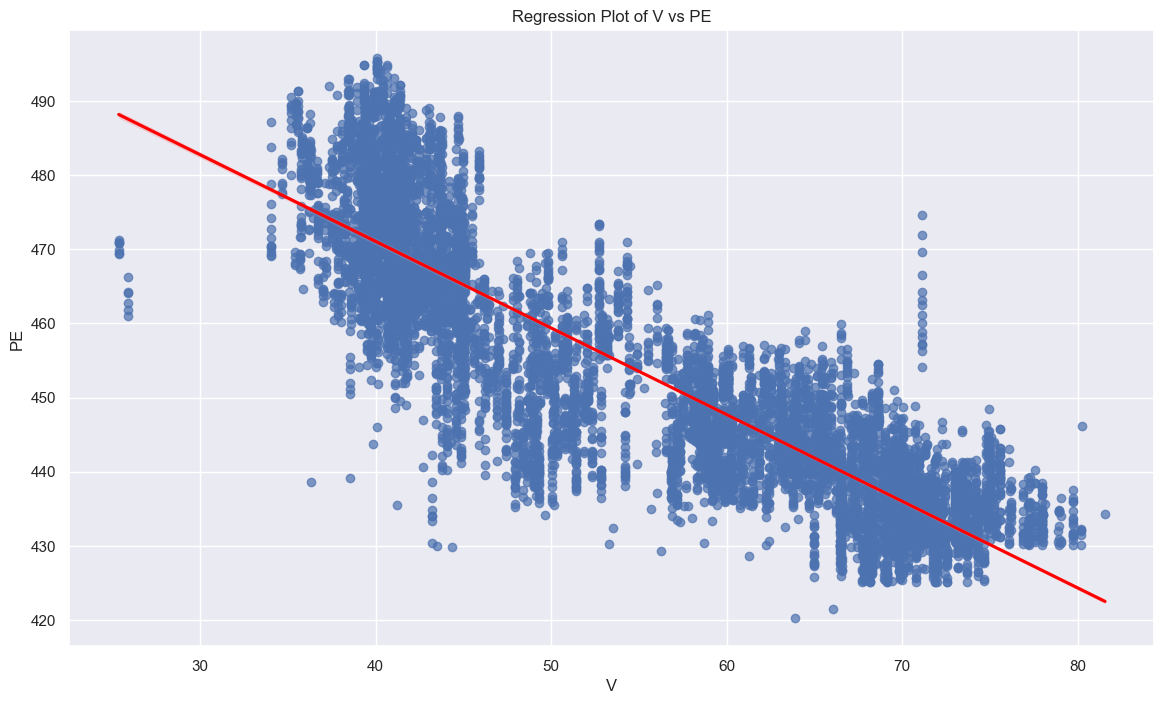

In [46]:
regression_plot('V', 'V', 'PE')

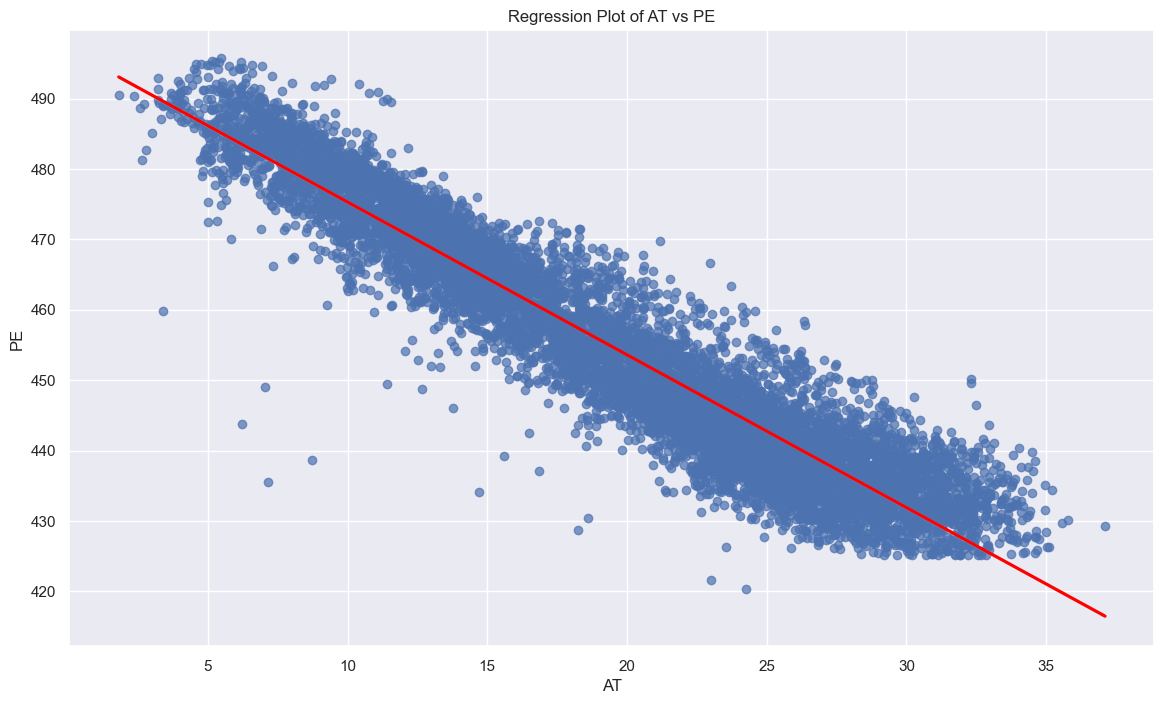

In [47]:
regression_plot('AT', 'AT', 'PE')

In [53]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(dftemp,df['PE'],test_size=0.25,random_state=0)
X_train.shape, X_test.shape

((7176, 4), (2392, 4))

In [54]:
X_train.corr()

AT         V        AP        RH
AT  1.000000  0.844040 -0.512233 -0.542582
V   0.844040  1.000000 -0.415609 -0.312113
AP -0.512233 -0.415609  1.000000  0.101119
RH -0.542582 -0.312113  0.101119  1.000000

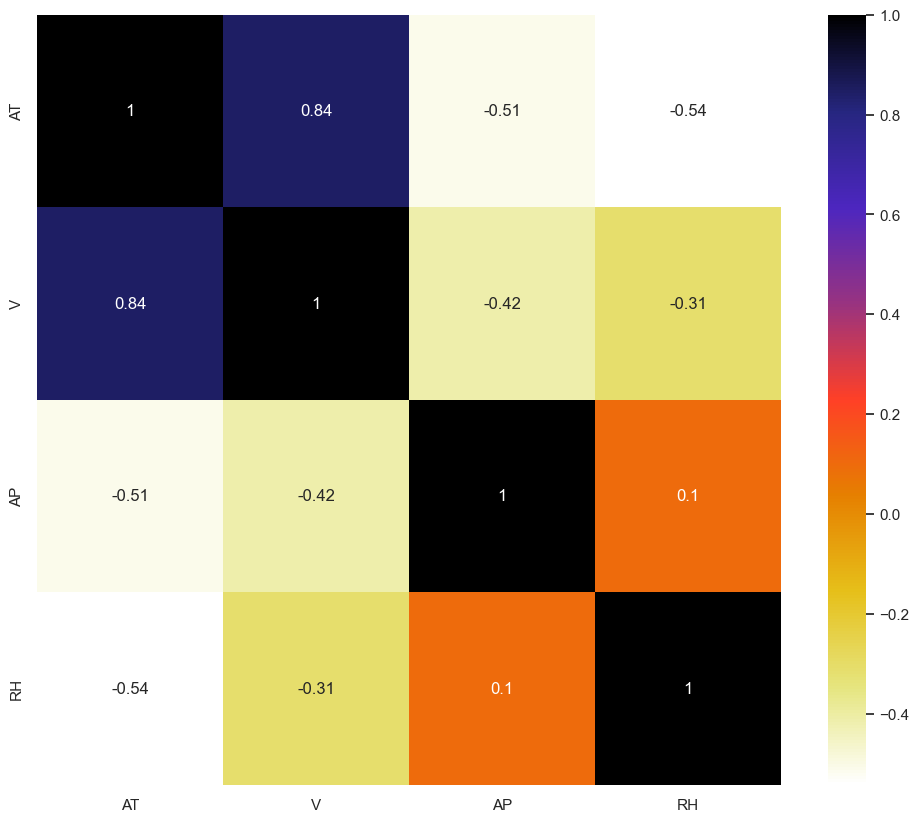

In [55]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [56]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [66]:
corr_features = correlation(X_train, 0.9)
corr_features

set()

In [67]:
def scaler_standard(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled

X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)

Text(0.5, 1.0, 'X_train After Scaling')

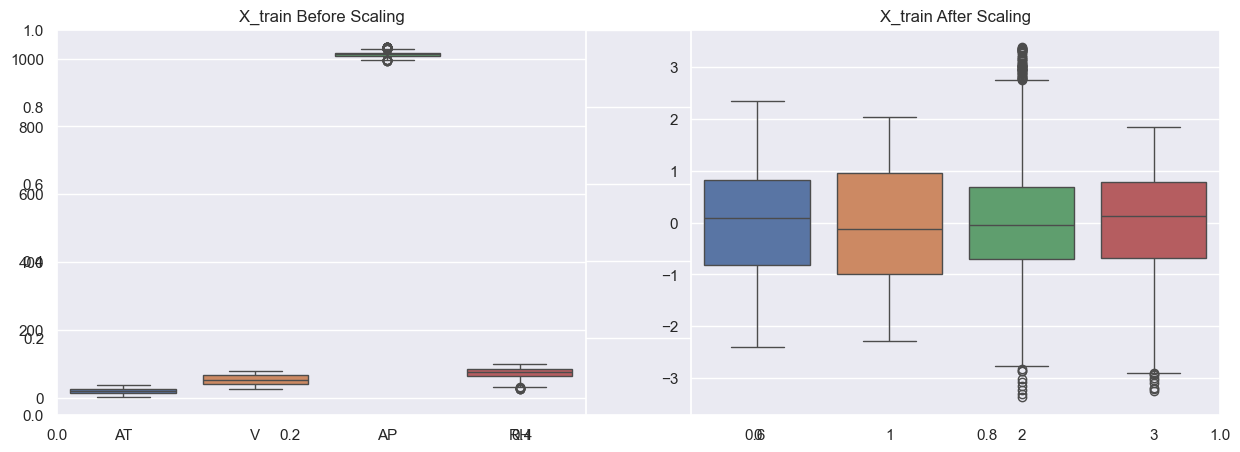

In [68]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

In [75]:
# Instantiate the regression model
LR_model = LinearRegression()

# Fit the model to the training data
LR_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = LR_model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Linear Regression
R2 Score value: 0.9324
MAE value: 3.5615


In [80]:
# Initialize the Random Forest model
RF_model = RandomForestRegressor(n_estimators=100, random_state=42)  # n_estimators is the number of trees in the forest

# Fit the model to the training data
RF_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = RF_model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("Random Forest Regressor")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Random Forest Regressor
R2 Score value: 0.9640
MAE value: 2.3892


In [82]:
# Initialize the KNN model
KNN_model = KNeighborsRegressor(n_neighbors=5)

# Fit the model to the training data
KNN_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = KNN_model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("K_Neighbours Regressor")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

K_Neighbours Regressor
R2 Score value: 0.9525
MAE value: 2.7762


In [86]:
param_grid =[{'bootstrap': [True, False],
'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110,120],
'max_features': ['auto', 'sqrt'],
'min_samples_leaf': [1, 3, 4],
'min_samples_split': [2, 6, 10],
'n_estimators': [5, 20, 50, 100]}]

f_reg = RandomForestRegressor()
Random_rf = RandomizedSearchCV(f_reg,param_grid, cv = 10, verbose=2,n_jobs = -1)
Random_rf.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions=[{'bootstrap': [True, False],
                                         'max_depth': [10, 20, 30, 40, 50, 60,
                                                       70, 80, 90, 100, 110,
                                                       120],
                                         'max_features': ['auto', 'sqrt'],
                                         'min_samples_leaf': [1, 3, 4],
                                         'min_samples_split': [2, 6, 10],
                                         'n_estimators': [5, 20, 50, 100]}],
                   verbose=2)

In [87]:
best_random_grid=Random_rf.best_estimator_

bestrf_pred = best_random_grid.predict(X_test_scaled)
mae = mean_absolute_error(y_test, bestrf_pred)
r2 = r2_score(y_test, bestrf_pred)


print("Random Forest Tuned")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Random Forest Tuned
R2 Score value: 0.9665
MAE value: 2.2969


In [89]:
file = bz2.BZ2File('factory_regression.pkl','wb')
pickle.dump(best_random_grid,file)
file.close()

In [93]:
with bz2.BZ2File('factory_regression.pkl', 'rb') as f:
    log_reg_model = pickle.load(f)

In [96]:
def predict(model):
    # Get user input for the features
    AT = float(input("Enter the value for AT: "))
    V = float(input("Enter the value for V: "))
    AP = float(input("Enter the value for AP: "))
    RH = float(input("Enter the value for RH: "))

    # Create a feature vector from the input
    features = [[AT, V, AP, RH]]

    # Make the prediction
    prediction = model.predict(features)

    # Output the prediction
    print(f"The prediction is: {prediction[0]}")

In [98]:
predict(log_reg_model)

The prediction is: 437.523795
